## <font color=green>Problem Statement: </font>

<font color=purple>__Context:__

The World Happiness Report is a landmark survey of the state of global happiness. The first 
report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 
Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released
at the United Nations at an event celebrating International Day of Happiness on March 20th. 
The report continues to gain global recognition as governments, organizations and civil society 
increasingly use happiness indicators to inform their policy-making decisions. Leading experts 
across fields – economics, psychology, survey analysis, national statistics, health, public policy
and more – describe how measurements of well-being can be used effectively to assess the progress  of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.
    
    
The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

### <font color=green>Importing requried libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from scipy.stats import zscore
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, Lasso, Ridge, RidgeCV
from sklearn.preprocessing import power_transform, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### <font color=green>Reading Data

In [2]:
df = pd.read_csv(r"C:\Users\Kushal Arya\Desktop\Data Analysis With Python\ML Files\happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
# Here we use shape command to know total no of rows and columns present in our dataset.

print('Rows and Columns in Dataset : ', df.shape )

Rows and Columns in Dataset :  (158, 12)


In [4]:
# Here we use info command to know all details about dataset i.e, size, type etc.
print('---------------------------------------------------------------------------')
print('\nInformations of dataset :-\n')
print(df.info())
print('\n---------------------------------------------------------------------------')


---------------------------------------------------------------------------

Informations of dataset :-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dysto

In [5]:
# Here we use isna() command to identify of nan in our dataset.
print('---------------------------------------------------------------------------')
print('\nNaN in dataset :-\n')
print(df.isna().sum())
print('\n---------------------------------------------------------------------------\n')


---------------------------------------------------------------------------

NaN in dataset :-

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

---------------------------------------------------------------------------



__<font color=purple>There is no null values in dataset.__

### <font color=green>Statistic of Dataset

In [6]:
# We use describe command to extracte statistical infomation about dataset.
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
# Display maximum rows.
pd.set_option("display.max_rows", None)

In [8]:
# Here we group region and country by their Happiness Rank .
group = df.groupby(['Region','Country'])[[ 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)','Health (Life Expectancy)']].sum()
group

Happiness Rank  \
Region                          Country                                    
Australia and New Zealand       Australia                             10   
                                New Zealand                            9   
Central and Eastern Europe      Albania                               95   
                                Armenia                              127   
                                Azerbaijan                            80   
                                Belarus                               59   
                                Bosnia and Herzegovina                96   
                                Bulgaria                             134   
                                Croatia                               62   
                                Czech Republic                        31   
                                Estonia                               73   
                                Georgia                              130   
                                Hungary                              104   
                                Kazakhstan                            54   
                                Kosovo                                69   
                                Kyrgyzstan                            77   
                                Latvia                                89   
                                Lithuania                             56   
                                Macedonia                             93   
                                Moldova                               52   
                                Montenegro                            82   
                                Poland                                60   
                                Romania                               86   
                                Russia                                64   
                                Serbia                                87   
                                Slovakia                              45   
                                Slovenia                              55   
                                Tajikistan                           106   
                                Turkmenistan                          70   
                                Ukraine                              111   
                                Uzbekistan                            44   
Eastern Asia                    China                                 84   
                                Hong Kong                             72   
                                Japan                                 46   
                                Mongolia                             100   
                                South Korea                           47   
                                Taiwan                                38   
Latin America and Caribbean     Argentina                             30   
                                Bolivia                               51   
                                Brazil                                16   
                                Chile                                 27   
                                Colombia                              33   
                                Costa Rica                            12   
                                Dominican Republic                    98   
                                Ecuador                               48   
                                El Salvador                           42   
                                Guatemala                             43   
                                Haiti                                119   
                                Honduras                             105   
                                Jamaica                               65   
                                Mexico                                14   
                              

<font color=purple>Australia and New Zealand are most happiest region.

### <font color=green>Drop unwanted column

In [9]:
df = df.drop(columns =['Region','Country'], axis = 1)
df.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


<font color=purple>We drop column because we want to visualizing data how it's distributed.


Distribution Plot :-



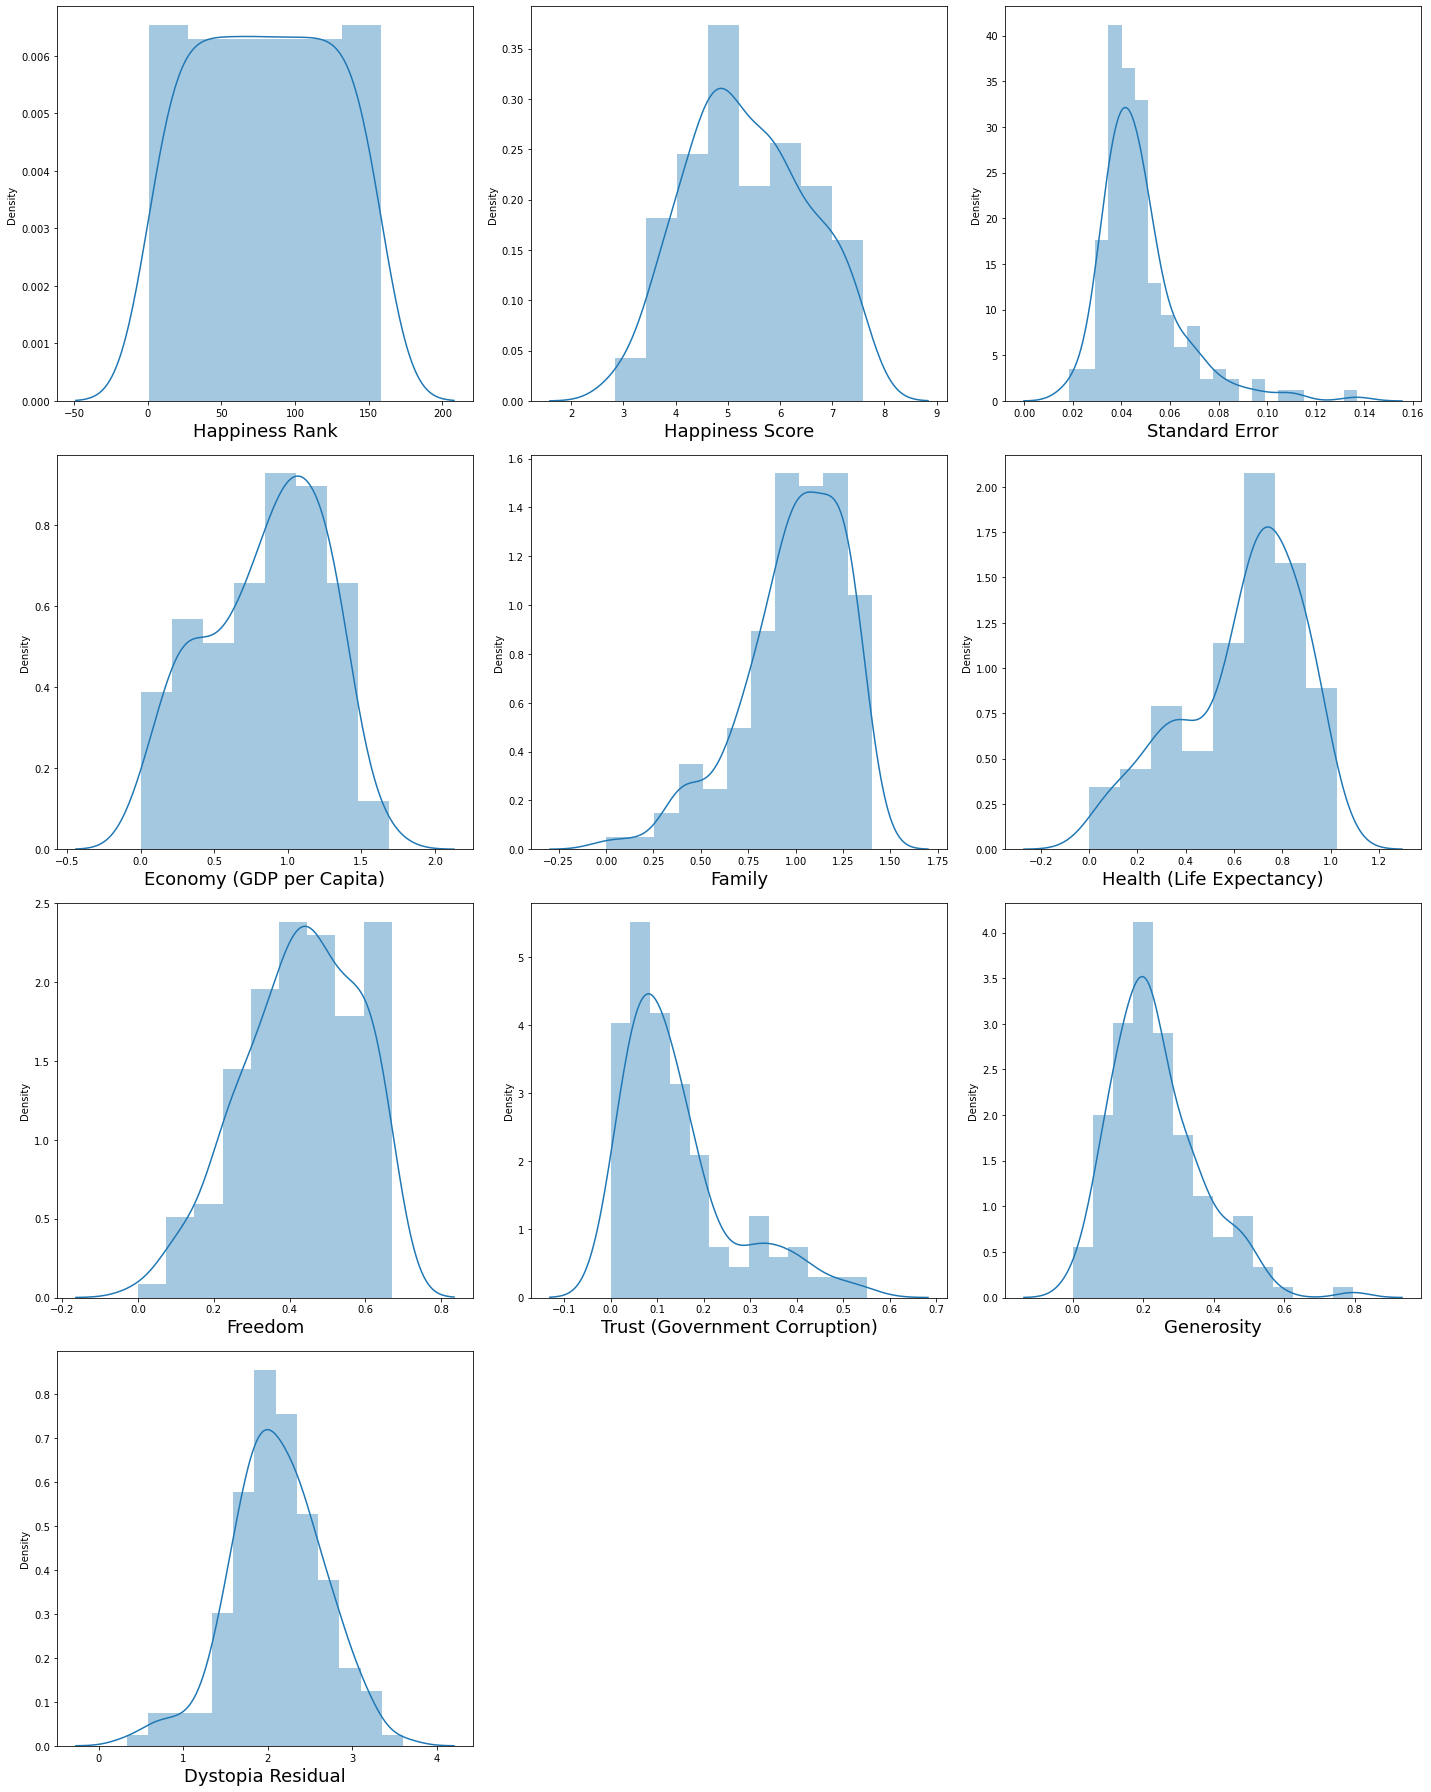

In [10]:
# Let' see how data is distributed in every columns.
print('\nDistribution Plot :-\n')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()
            

<font color=purple>Here we found outlier in some columns.

### <font color=green>Visualizing relationship

In [11]:
# Before visulalizing we have to devide dataset into feature and label.
x = df.drop('Happiness Score', axis = 1)
y = df['Happiness Score']


Relationship Plot :-



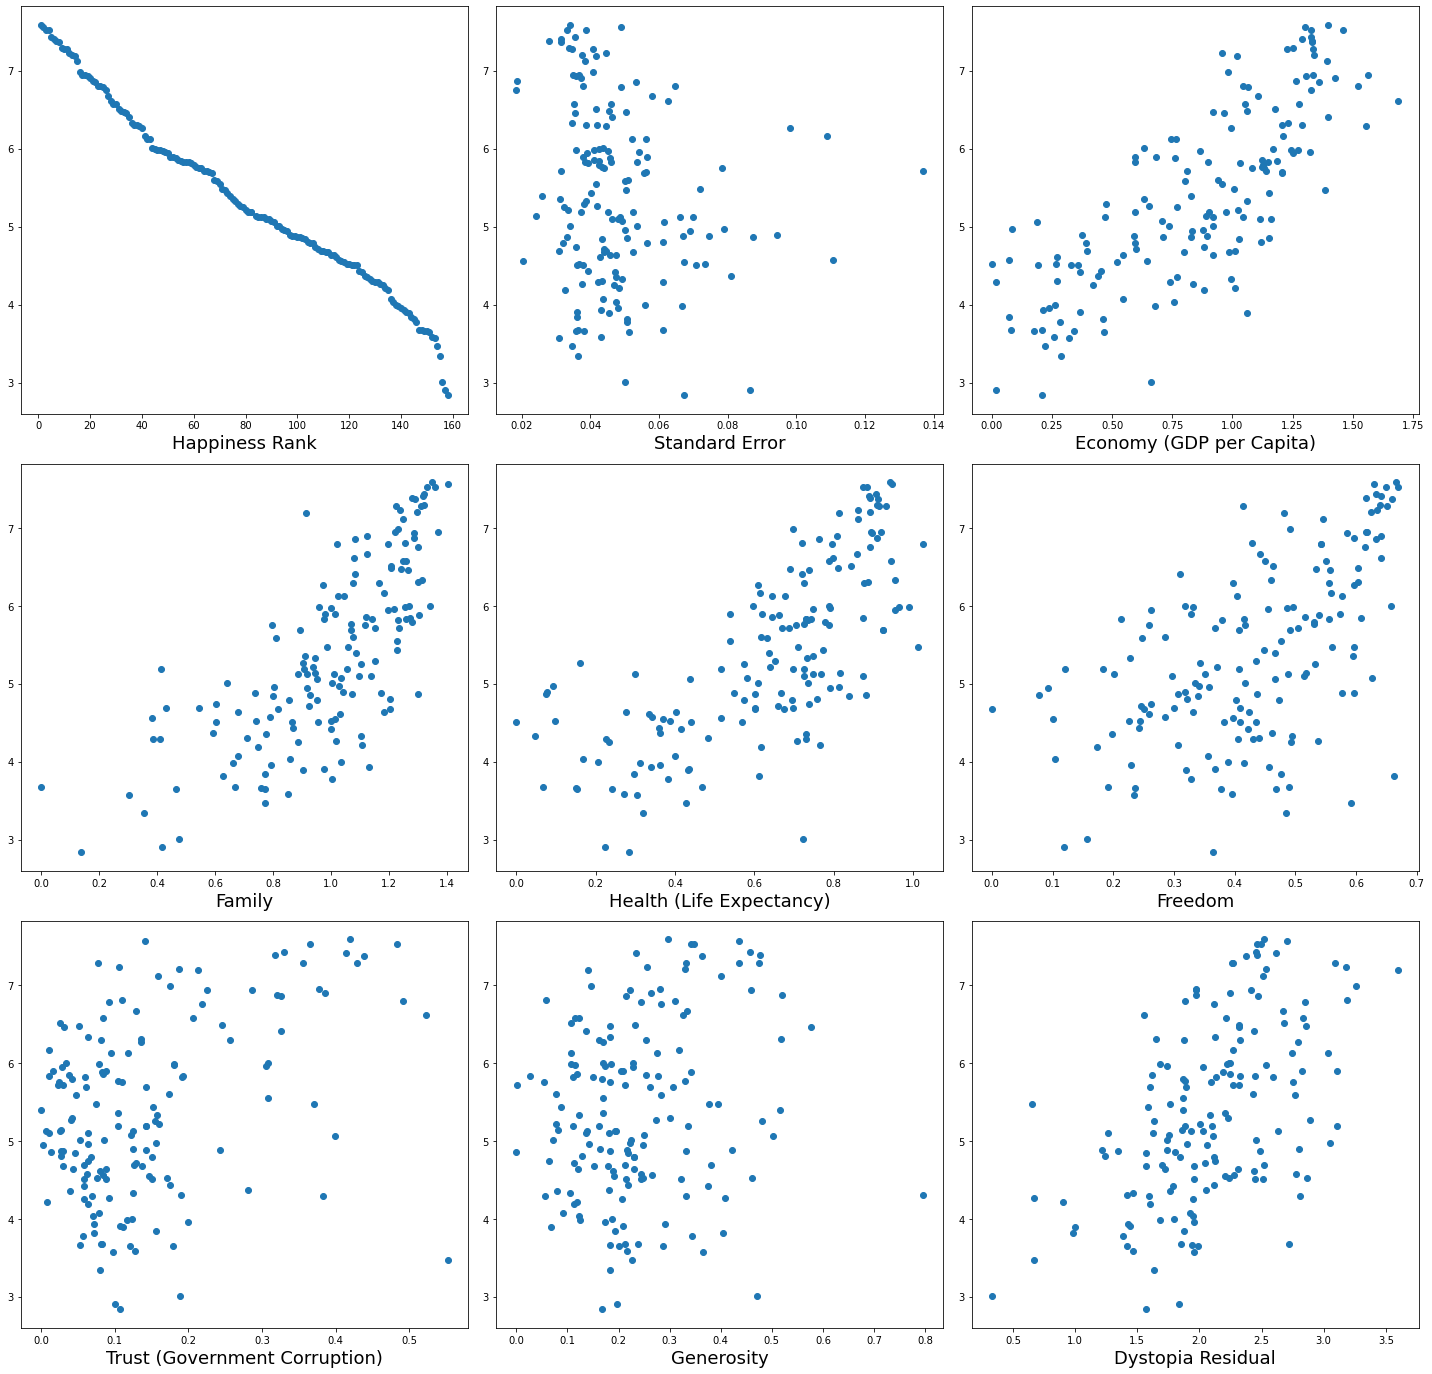

In [12]:
# Let' see how data is related to label .
print('\nRelationship Plot :-\n')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in x:
    if plotnumber <=12:
        ax = plt.subplot(4,3, plotnumber)
        plt.scatter(x[column], y)
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

### <font color=green>Plotting Heatmap (Correlation matrix)

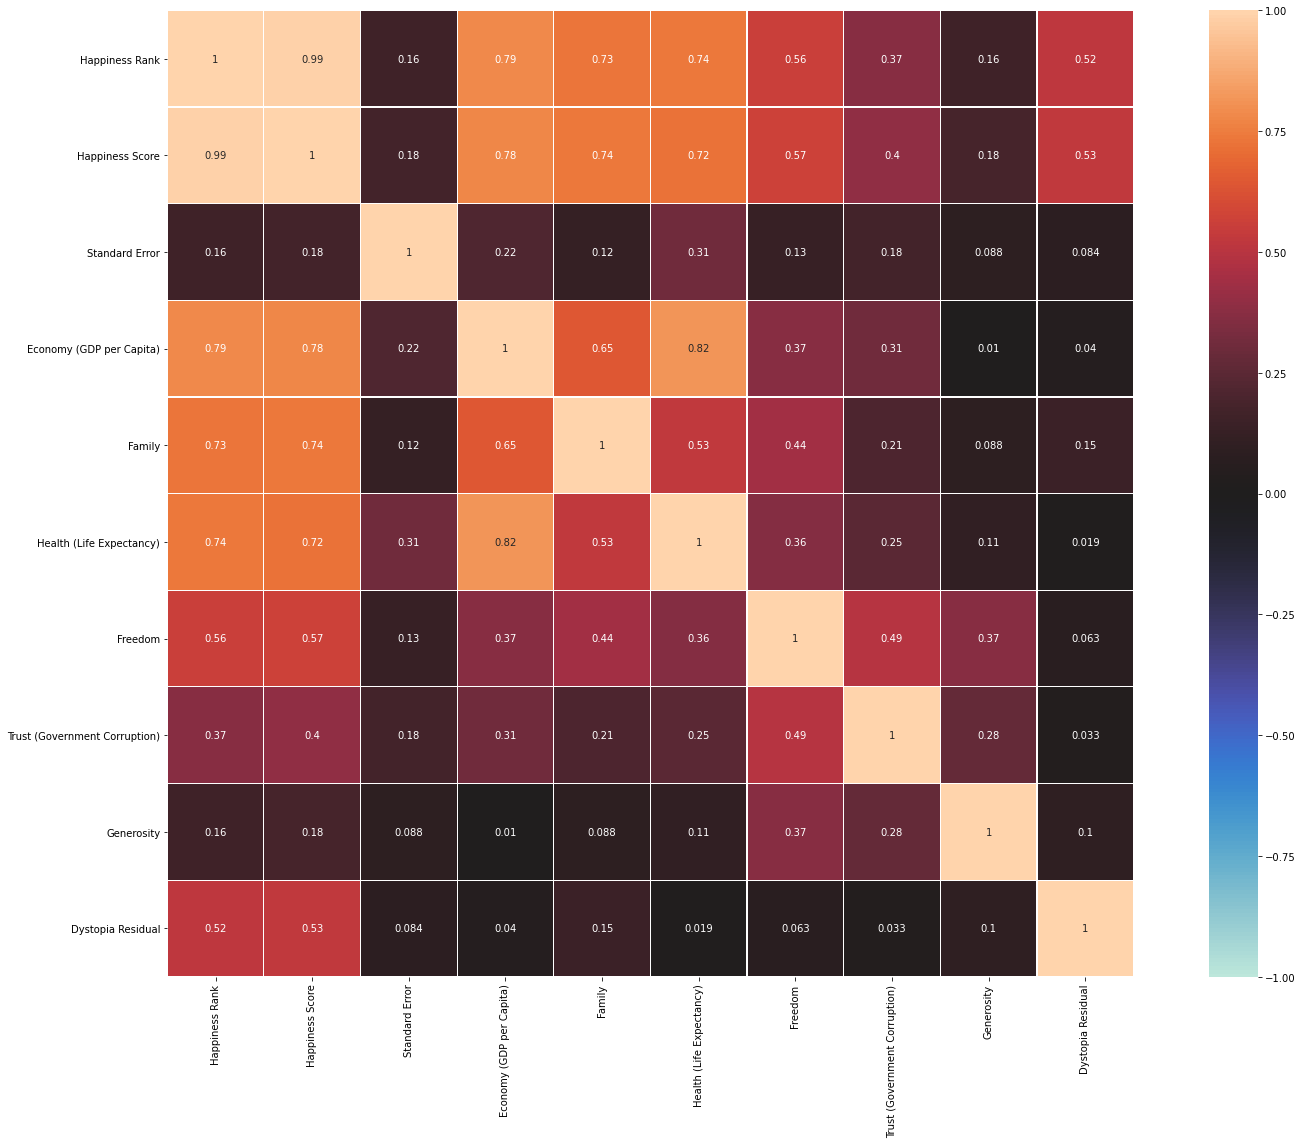

In [13]:
df_corr = df.corr().abs()

plt.figure(figsize = (22,16))
sns.heatmap(df_corr, vmin = -1, annot = True, square = True, center = 0, fmt = '.2g', linewidths = .1 )
plt.tight_layout()

<font color=purple>Observation : Happiness Score and Happiness Rank are corelated  .

### <font color=green>Detecting Outlier with the help of boxplot

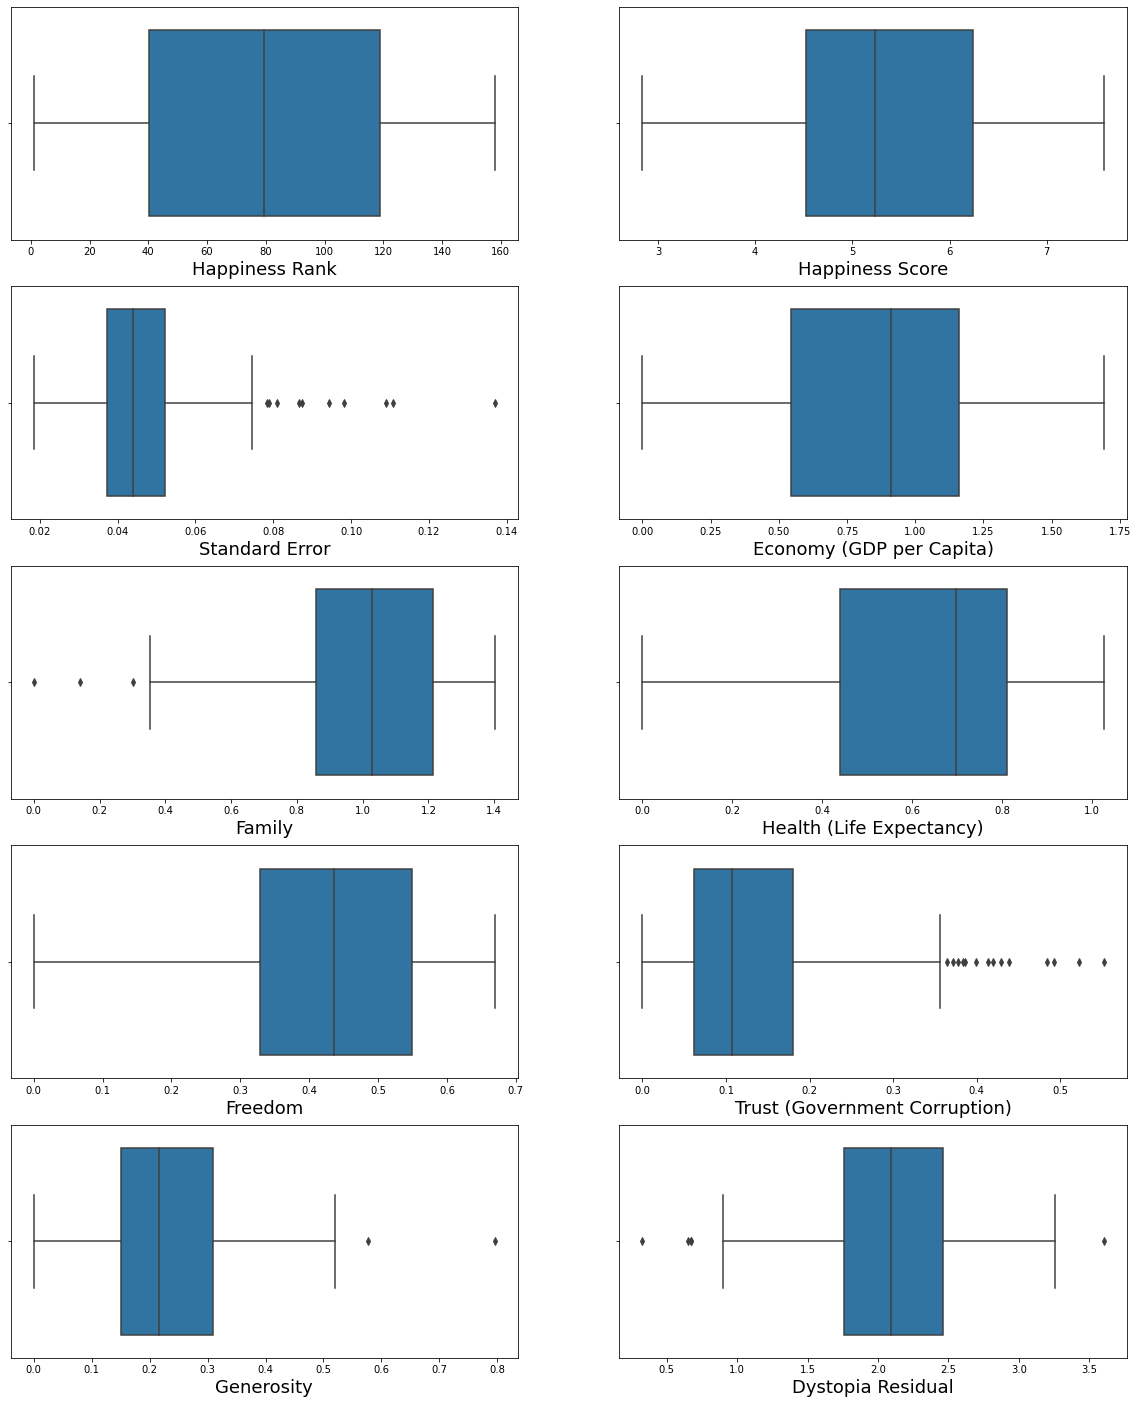

In [14]:
# Visualize the outliers using boxplot
plt.figure(figsize = (20,30))
graph = 1

for column in df:
    if graph <=12:
        ax = plt.subplot(6,2, graph)
        sns.boxplot(df[column], orient = 'v')
        plt.xlabel(column, fontsize = 18)
    graph +=1
plt.show()

<font color=purple>Outlier present in our dataset.

### <font color=green>Removing Outlier

In [15]:
# we are removing the top 2% data from the Dystopia Residual column
q = df['Dystopia Residual'].quantile(0.98)
data_cleaned = df[df['Dystopia Residual']<q]
# we are removing the top 1% data from the Generosity column
q = df['Generosity'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['Generosity']<q]
# we are removing the top 5% data from the Trust (Government Corruption) column
q = df['Trust (Government Corruption)'].quantile(0.90)
data_cleaned = data_cleaned[data_cleaned['Trust (Government Corruption)']<q]
# we are removing the top 5% data from the Standard Error  column
q = df['Standard Error'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned['Standard Error']<q]
# we are removing the top 5% data from the Health (Life Expectancy)  column
q = df['Health (Life Expectancy)'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned['Health (Life Expectancy)']<q]

In [16]:
df.shape

(158, 10)


Distribution Plot :-



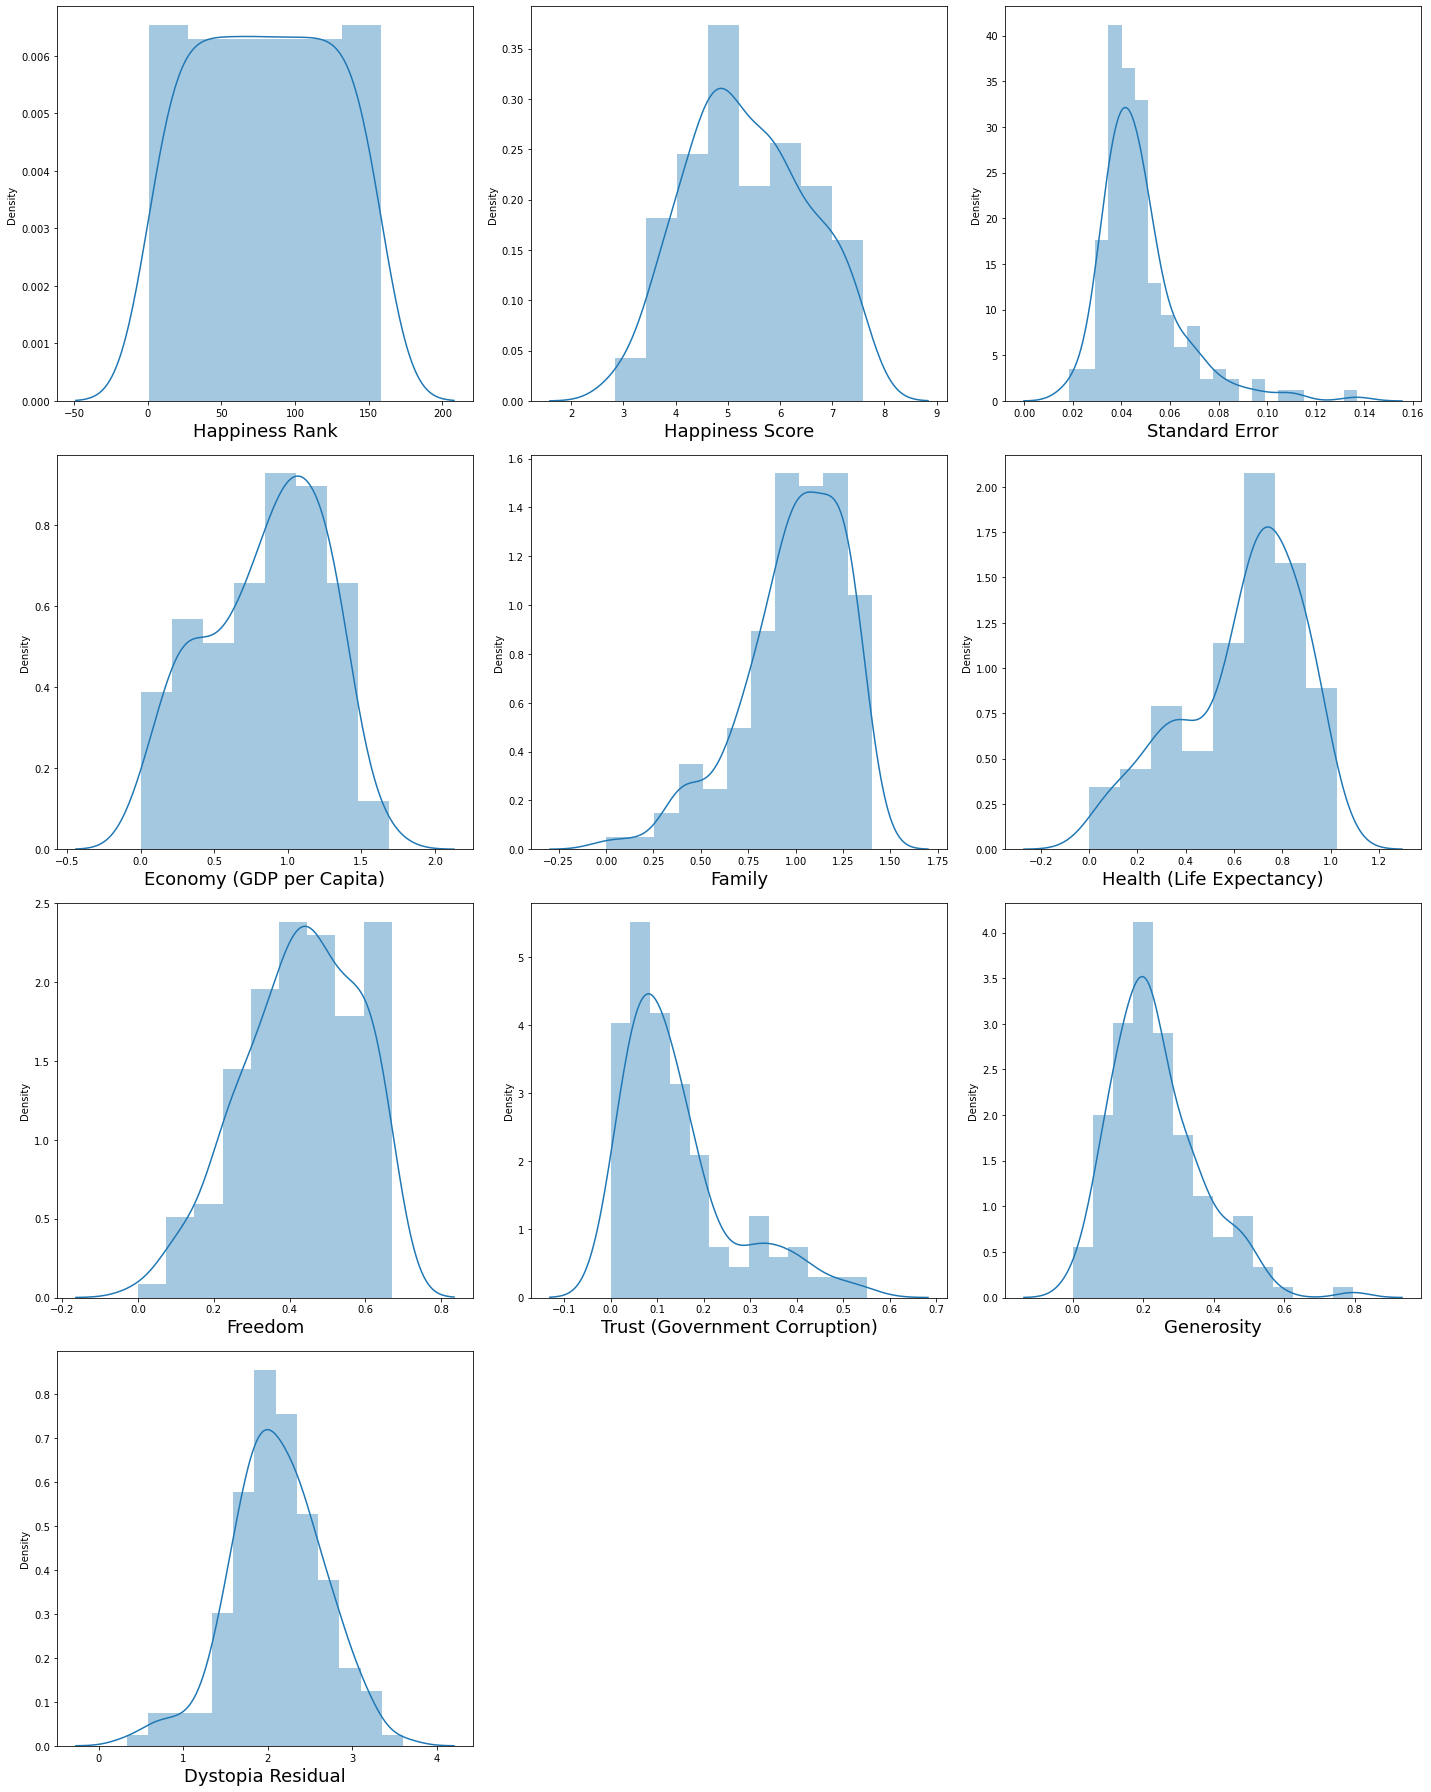

In [17]:
# Let' see outliers are removed in columns or not.
print('\nDistribution Plot :-\n')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

<font color=purple>Outliers are removed from our dataset.

### <font color=green>Checking skewness present in our dataset.

In [18]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

<font color=purple>Skewness present in our dataset.

### <font color=green>Removing skewness using Power Transform .

In [19]:
df1 = power_transform(x)
df1 = pd.DataFrame(df1, columns = x.columns)

In [20]:
# Checking skewness
df1.skew()

Happiness Rank                  -0.264365
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

In [21]:
df1.head() # seeing our data set

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-2.063414,-0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992
1,-2.008498,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011
2,-1.958574,-1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275
3,-1.912062,-0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035
4,-1.868100,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118



Distribution Plot :-



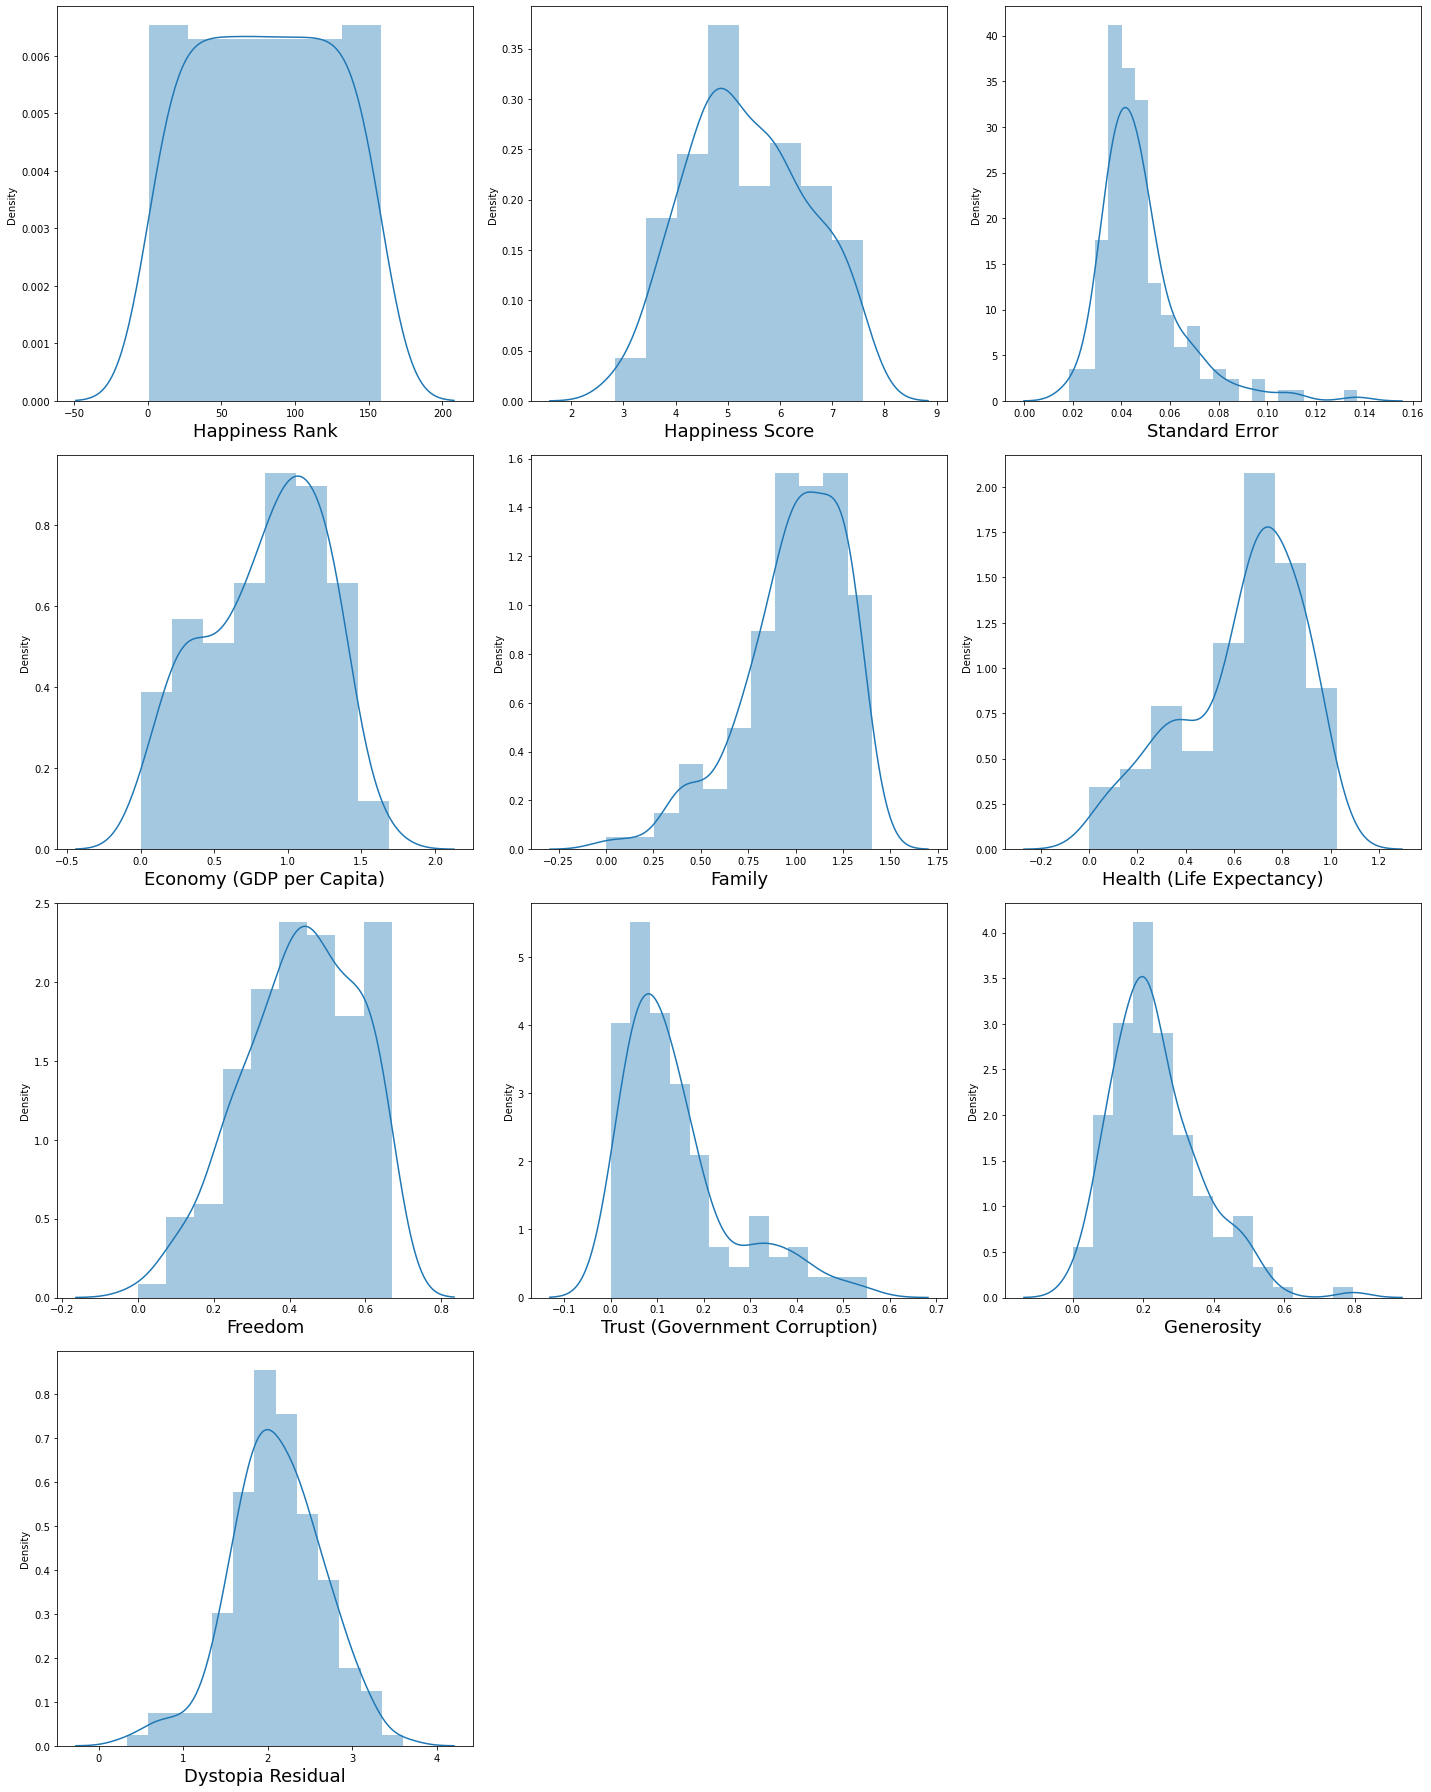

In [22]:
# Let' check skewness are removed in columns or not.
print('\nDistribution Plot :-\n')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

#### <font color=purple>Skewness removed from our dataset.

### <font color= green>Checking Multicollinearity present in our dataset we use VIF.

In [23]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['Vif'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif

,Features,Vif
0,Happiness Rank,83.686479
1,Standard Error,1.145322
2,Economy (GDP per Capita),14.093148
3,Family,6.705455
4,Health (Life Expectancy),8.585592
5,Freedom,3.459032
6,Trust (Government Corruption),2.086227
7,Generosity,2.064874
8,Dystopia Residual,18.293069


<font color=purple>Obsevation : Multicollinearity present our dataset. Our dataset is small if we remove we lost some important value and we did not build good model to order to avoid this problem we deside to go with multicollinearity.

### <font color = green> Data Scaling

In [24]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.72099989, -0.80592569,  1.36962124, ...,  2.30965159,
         0.47103971,  0.75825809],
       [-1.69907456,  0.05588945,  1.13522625, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-1.67714922, -0.8544869 ,  1.19286069, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 1.67742676,  0.13253425, -0.45524543, ...,  0.38141902,
         1.85689094, -3.20843049],
       [ 1.69935209,  2.26396166, -2.06756644, ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.72127743,  1.13418227, -1.58633379, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

#### <font color = purple> We scaled our features data above.

### <font color = green> Split data into train and test. Model will be bulit on training data and tested on test data.

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 355)
print('Data has been splited.')

Data has been splited.


## <font color = green>Model Building.

### <font color = green>Linear Regression model instantiaing, training and evaluating

In [26]:
Lr = LinearRegression()
Lr.fit(x_train, y_train)
y_pred = Lr.predict(x_test)

In [31]:
print('Score of test data ---->', Lr.score(x_test, y_test))

Score of test data ----> 0.9999999533878745


In [35]:
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))

MSE of Model -------> 6.832299011078998e-08


In [36]:
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Model -------> 0.0002613866678137773


### <font color = green>Here we use Lasso Regularization to avoid overfitting 

In [39]:
# LassoCV will return best alpha after max itratation.
# Normalize is subtracting the mean and dividing by the L2-norm.

lassocv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lassocv.fit(x_train,y_train)

LassoCV(normalize=True)

In [40]:
alpha = lassocv.alpha_
alpha

0.00010200443251839897

In [41]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00010200443251839897)

In [42]:
print('Lasso Score =======>', lasso_reg.score(x_train, y_train))

Lasso Score =======> 0.9999992584089135


### <font color = purple>Conclusion : Linear Regression model has 99% score and there is no overfitting.

### <font color = green>Knn model instantiaing, training and evaluating

In [45]:
Knn = KNeighborsRegressor()
Knn.fit(x_train, y_train)
y_pred = Knn.predict(x_test)

In [91]:
print('----------------------------------------------------------\n')
print('Score of test data ---->', Knn.score(x_test, y_test))
print('\n---------------------------------------------------------\n')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('\n---------------------------------------------------------\n')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('\n---------------------------------------------------------')
print('\n R2 Score ----->', r2_score(y_test, y_pred))
print('\n------------------------------------------------------------')

----------------------------------------------------------

Score of test data ----> 0.8981043915868532

---------------------------------------------------------

MSE of Model -------> 0.01766450773999975

---------------------------------------------------------

RMSE of Model -------> 0.13290789194024466

---------------------------------------------------------

 R2 Score -----> 0.9879487087612625

------------------------------------------------------------


### <font color = green>Here we use Lasso Regularization to avoid overfitting

In [52]:
# LassoCV will return best alpha after max itratation.
# Normalize is subtracting the mean and dividing by the L2-norm.

lassocv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lassocv.fit(x_train,y_train)

LassoCV(normalize=True)

In [53]:
alpha = lassocv.alpha_
alpha

0.00010200443251839897

In [54]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00010200443251839897)

In [55]:
print('Lasso Score =======>', lasso_reg.score(x_train, y_train))

Lasso Score =======> 0.9999992584089135


### <font color = purple>Conclusion : Knn model has 99% score and there is no overfitting.

### <font color = green>Decision Tree model instantiaing, training and evaluating

In [63]:
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)

In [88]:
print('----------------------------------------------------------\n')
print('Score of test data ---->', DT.score(x_test, y_test))
print('\n---------------------------------------------------------\n')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('\n---------------------------------------------------------\n')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('\n---------------------------------------------------------')
print('\n R2 Score ----->', r2_score(y_test, y_pred))
print('\n-------------------------------------------------------------')

----------------------------------------------------------

Score of test data ----> 0.9878580283622106

---------------------------------------------------------

MSE of Model -------> 0.01766450773999975

---------------------------------------------------------

RMSE of Model -------> 0.13290789194024466

---------------------------------------------------------

 R2 Score -----> 0.9879487087612625

-------------------------------------------------------------


### <font color = green>Here we use Lasso Regularization to avoid overfitting

In [65]:
# LassoCV will return best alpha after max itratation.
# Normalize is subtracting the mean and dividing by the L2-norm.

lassocv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lassocv.fit(x_train,y_train)

LassoCV(normalize=True)

In [66]:
alpha = lassocv.alpha_
alpha

0.00010200443251839897

In [67]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00010200443251839897)

In [68]:
print('Lasso Score =======>', lasso_reg.score(x_train, y_train))

Lasso Score =======> 0.9999992584089135


### <font color = purple>Conclusion : Decision Tree model has 99% score and there is no overfitting.

### <font color = green>Random Forest model instantiaing, training and evaluating

In [78]:
Rn = RandomForestRegressor()
Rn.fit(x_train, y_train)
y_pred = Rn.predict(x_test)

In [90]:
print('----------------------------------------------------------\n')
print('Score of test data ---->', Rn.score(x_test, y_test))
print('\n---------------------------------------------------------\n')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('\n---------------------------------------------------------\n')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('\n---------------------------------------------------------')
print('\n R2 Score ----->', r2_score(y_test, y_pred))
print('\n------------------------------------------------------------')

----------------------------------------------------------

Score of test data ----> 0.9879487087612625

---------------------------------------------------------

MSE of Model -------> 0.01766450773999975

---------------------------------------------------------

RMSE of Model -------> 0.13290789194024466

---------------------------------------------------------

 R2 Score -----> 0.9879487087612625

------------------------------------------------------------


### <font color = green>Here we use Lasso Regularization to avoid overfitting

In [80]:
# LassoCV will return best alpha after max itratation.
# Normalize is subtracting the mean and dividing by the L2-norm.

lassocv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lassocv.fit(x_train,y_train)

LassoCV(normalize=True)

In [81]:
alpha = lassocv.alpha_
alpha

0.00010200443251839897

In [82]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00010200443251839897)

In [83]:
print('Lasso Score =======>', lasso_reg.score(x_train, y_train))

Lasso Score =======> 0.9999992584089135


### <font color = purple>Conclusion : Random Forest model has 99% score and there is no overfitting.

### <font color = green>SVM model instantiaing, training and evaluating

In [93]:
svr = SVR()
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)

In [95]:
print('----------------------------------------------------------\n')
print('Score of test data ---->', svr.score(x_test, y_test))
print('\n---------------------------------------------------------\n')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('\n---------------------------------------------------------\n')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('\n---------------------------------------------------------')
print('\n R2 Score ----->', r2_score(y_test, y_pred))
print('\n------------------------------------------------------------')

----------------------------------------------------------

Score of test data ----> 0.9198940803614892

---------------------------------------------------------

MSE of Model -------> 0.11741742933950625

---------------------------------------------------------

RMSE of Model -------> 0.342662267166238

---------------------------------------------------------

 R2 Score -----> 0.9198940803614892

------------------------------------------------------------


### <font color = green>Here we use Lasso Regularization to avoid overfitting

In [96]:
# LassoCV will return best alpha after max itratation.
# Normalize is subtracting the mean and dividing by the L2-norm.

lassocv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lassocv.fit(x_train,y_train)

LassoCV(normalize=True)

In [97]:
alpha = lassocv.alpha_
alpha

0.00010200443251839897

In [98]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00010200443251839897)

In [99]:
print('Lasso Score =======>', lasso_reg.score(x_train, y_train))

Lasso Score =======> 0.9999992584089135


### <font color = purple>Conclusion : SVM model has 99% score and there is no overfitting.

## <font color = green>Saving The Model

In [106]:
# saving the model to the Local file system
filename = 'finalized_Lr_model.pickle'
pickle.dump(Lr, open(filename, 'wb'))

## <font color = purple>Final Conclusion : Linear Regression is our best model.